Copyright (C) 2021 NiloufarShoeibi

# Installation

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=36650c9bab524464ec180813f4292a7e22c543ff7b179b4df184c88969770e4d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


# Importing Requirements

In [2]:
import face_recognition
import os 
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw

# Inputs

In [140]:
img_folder = r"./Datasets/Images with identities" # The path to the Folder containing the images & corresponding identities 
test_img_folder = r"./Datasets/Unknown Images" # The path to the Folder containing the Unknown Images

# Functions

In [150]:
def extract_paths(img_folder):
    image_path = []
    for dir1 in os.listdir(img_folder):
        image_path.append(os.path.join(img_folder, dir1))
    return image_path

In [172]:
def Load_images (paths):
    images =[]
    for i in range(len(paths)):
        try:
            images.append(face_recognition.load_image_file(paths[i]))
        except IsADirectoryError:
            print(paths[i] ," is a directory not an image, and it's skipped")
    return (images)

In [152]:
def Face_location (images):
    locations = []
    for i in range(len(images)):
        locations.append(face_recognition.face_locations(images[i]))
    return locations

In [153]:
def Face_encoding (images):
    encoding=[]
    for i in range(len(images)):
        FE = face_recognition.face_encodings(images[i])
        if len(FE)>0:
            encoding.append(FE[0])
    return encoding

In [154]:
def extract_labels(folder):
    image_labels = []
    for dir1 in os.listdir(folder):
        image_labels.append(dir1.split('.')[0])
    return image_labels

In [155]:
def Find_Faces (Prediction_images, face_path):
    unknown_face_locations = []
    for i in range(len(Prediction_images)):
        unknown_face_locations.append(face_recognition.face_locations(Prediction_images[i]))
        if len(unknown_face_locations[i])!=0:
            face_image = []
            encodings = []
            for j in range(len(unknown_face_locations[i])):
                top,right,bottom, left = unknown_face_locations[i][j]
                face_image.append(Prediction_images[i][top-5:bottom+5, left-5:right+5])
                pill_image = Image.fromarray(face_image[j])
                #PILL_IMAGES.append(pill_image)
                display(pill_image)
                pill_image.save(f'{face_path}/{top}_{right}_{bottom}_{left}.jpg')

In [158]:
def Face_identification (img_folder,face_path):
    # Load Pathes
    faces_paths = extract_paths(face_path)
    # Load Images
    Face_Predictions = Load_images (faces_paths)
    # Face Locations
    unknown_face_locations = Face_location (Face_Predictions)
    # Face Encodings
    unknown_face_encodings = Face_encoding (Face_Predictions)
    pil_images =[]
    names=[]
    pat =[]
    for i in range(len(Face_Predictions)):
        pil_image = Image.fromarray(Face_Predictions[i])
        pil_images.append(pil_image)
        draw = ImageDraw.Draw(pil_image)
        for (t,r,b,l),name in zip(unknown_face_locations[i],unknown_face_encodings[i]):
            matches = face_recognition.compare_faces(known_face_encodings, unknown_face_encodings[i])
            
            # Instead, use face_distance to calculate similarities
            face_distances = face_recognition.face_distance(known_face_encodings, unknown_face_encodings[i])
            best_match_index = np.argmin(face_distances)
            name = "Unknown"
            if matches[best_match_index]:
                name = known_face_names[best_match_index]
            # Draw a box around the face using the Pillow module
            draw.rectangle(((l, t), (r, b)), outline=(0, 0, 255))
            # Draw a label with a name below the face 
            width, height = draw.textsize(name)
            draw.rectangle(((l, b - height - 10), (r, b)), fill=(0, 0, 255),     outline=(0, 0, 255))
            draw.text((l + 6, b - height - 5), name, fill=(255, 255, 255, 255))
        if unknown_face_locations[i] == [[]]:
            names.append('No Face Detected')
            pat.append(faces_paths[i])
            print(i)
        else:
            names.append(name)
            pat.append(faces_paths[i])
            
        display(pil_images[i])
    result = pd.DataFrame()
    result ['Path'] = pat
    result['name'] = names
    return result

# Main

In [184]:
#Paths to the known and unknown images
paths = extract_paths(img_folder)
test_paths = extract_paths(test_img_folder)
#Loading Images
Images = Load_images (paths)
Prediction_images = Load_images (test_paths)
# Finding Face Locations
known_face_locations = Face_location (Images)
unknown_face_locations = Face_location (Prediction_images)
# Known Face Encoding
known_face_encodings = Face_encoding (Images)
# Known Face Names
known_face_names = extract_labels(img_folder)

./Datasets/Unknown Images/.ipynb_checkpoints  is a directory not an image, and it's skipped


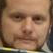

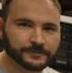

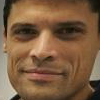

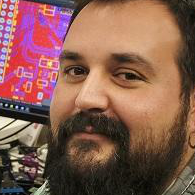

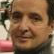

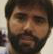

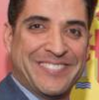

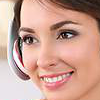

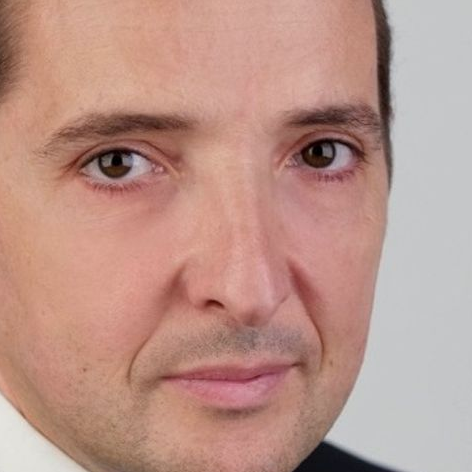

In [185]:
new_test_path = r'./Datasets/Faces'
Find_Faces (Prediction_images, new_test_path)

./Datasets/Faces/.ipynb_checkpoints  is a directory not an image, and it's skipped


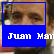

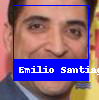

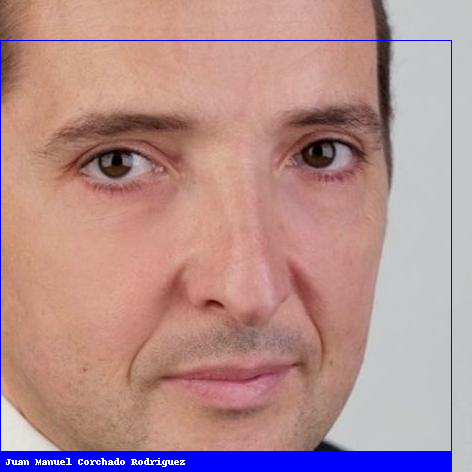

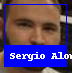

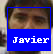

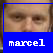

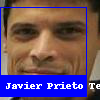

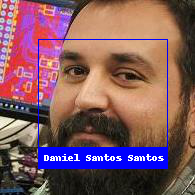

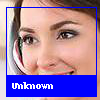

,Path,name
0,./Datasets/Faces/122_487_166_443.jpg,Juan Manuel Corchado Rodriguez
1,./Datasets/Faces/56_145_146_56.jpg,Emilio Santiago Corchado Rodriguez
2,./Datasets/Faces/246_759_708_297.jpg,Juan Manuel Corchado Rodriguez
3,./Datasets/Faces/59_128_122_66.jpg,Sergio Alonso Rollan
4,./Datasets/Faces/74_362_118_319.jpg,Javier J
5,./Datasets/Faces/204_261_247_218.jpg,marcel
6,./Datasets/Faces/76_892_166_802.jpg,Javier Prieto Tejedor
7,./Datasets/Faces/284_716_469_531.jpg,Daniel Santos Santos
8,./Datasets/Faces/.ipynb_checkpoints,Unknown


In [186]:
Face_identification (img_folder,new_test_path)